In [ ]:
!pip install plotly

from datascience import *
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('fivethirtyeight')
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Plotly plotting support
import plotly.plotly as py

# import cufflinks as cf
# cf.go_offline() # required to use plotly offline (no account required).

import plotly.graph_objs as go
import plotly.figure_factory as ff

## Classification examples

In [4]:
ckd = Table.read_table('http://inferentialthinking.com/notebooks/ckd.csv').relabeled('Blood Glucose Random', 'Glucose')
ckd.show(3)

Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1
53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,1
63,70,1.01,3,0,abnormal,abnormal,present,notpresent,380,60,2.7,131,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,1


In [5]:
ckd.group('Class')

Class,count
0,115
1,43


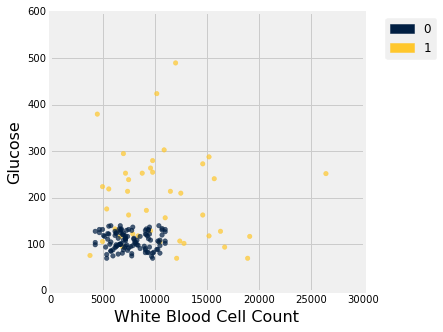

In [6]:
ckd.scatter('White Blood Cell Count', 'Glucose', colors='Class')

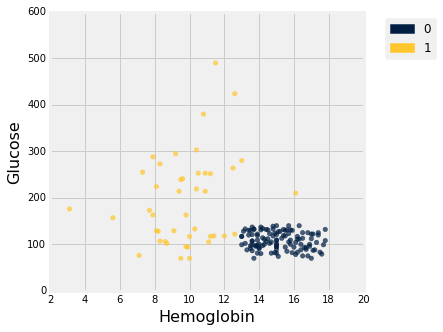

In [7]:
ckd.scatter('Hemoglobin', 'Glucose', colors='Class')

In [33]:
banknotes = Table.read_table('http://inferentialthinking.com/notebooks/banknote.csv')
banknotes.show(3)

WaveletVar,WaveletSkew,WaveletCurt,Entropy,Class
3.6216,8.6661,-2.8073,-0.44699,0
4.5459,8.1674,-2.4586,-1.4621,0
3.866,-2.6383,1.9242,0.10645,0


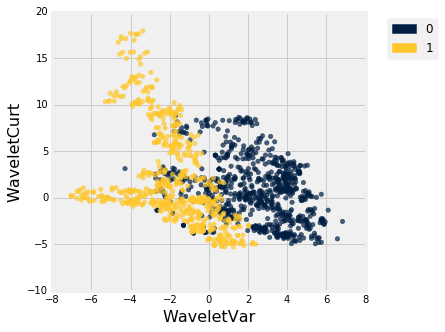

In [9]:
banknotes.scatter('WaveletVar', 'WaveletCurt', colors='Class')

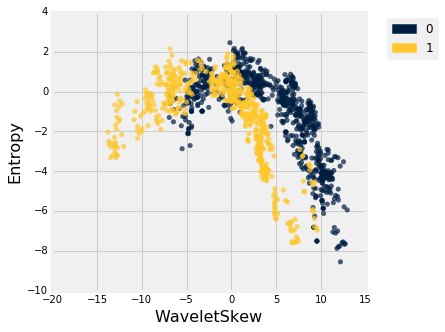

In [10]:
banknotes.scatter('WaveletSkew', 'Entropy', colors='Class')

In [ ]:
# This is a lot of code that you don't need to understand!
legit = banknotes.where('Class', 0)
fake = banknotes.where('Class', 1)

legit_points = go.Scatter3d(
    x=legit.column('WaveletSkew'),
    y=legit.column('WaveletVar'), 
    z=legit.column('WaveletCurt'), 
    mode='markers',
    marker=dict(
        size=3,
        line=dict(
            color='rgba(0, 30, 66, 0.1)',
            width=0.1
        ),
        opacity=1
    )
)

fake_points = go.Scatter3d(
    x=fake.column('WaveletSkew'),
    y=fake.column('WaveletVar'), 
    z=fake.column('WaveletCurt'), 
    mode='markers',
    marker=dict(
        size=3,
        line=dict(
            color='rgba(255, 199, 44, 0.1)',
            width=0.1
        ),
        opacity=1
    )
)

In [32]:
data = [legit_points, fake_points]
# Axis labels
layout = go.Layout(
    scene=go.Scene(
        xaxis=go.XAxis(title='WaveletSkew'),
        yaxis=go.YAxis(title='WaveletVar'),
        zaxis=go.ZAxis(title='WaveletCurt'),
        aspectratio=dict(x=1.,y=1., z=1.)
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="lec35-banknotes")